# Overview

The purpose of this example is to give our users a better understanding of how the roadnetwork is represented in BeamNG.
To do so we screate a scenario using the West Coast USA level, extract all geographic road data, and plot it.

## Setup

This example relies on different classes from the beamngpy module, the external library shapely, and matplotlib. 



In [1]:
from shapely.geometry import MultiLineString
from matplotlib import pyplot as plt

from beamngpy import BeamNGpy, Vehicle, Scenario

## Scenario Creation

A simple scenario is created in order to access the geographic data from the game.


In [2]:
beamng = BeamNGpy('localhost', 64256)

scenario = Scenario('west_coast_usa', 'road_map_example')
orig = (568.908386, 13.4217358,  148.56546)

vehicle = Vehicle('ego_vehicle', model='pickup', licence='PYTHON')
scenario.add_vehicle(vehicle, pos=orig)

scenario.make(beamng)

## Running the Scenario

With the scenario created, we finally start the simulator and load our created scenario. The scenario simulation does not start immediately after loading, but only when the user triggers the start using start_scenario().

In [3]:
bng = beamng.open()
bng.load_scenario(scenario)
bng.start_scenario()

## Fetching and Plotting the Road's Data

At first we get the road's data. As we are only interested in their id's we discard any other information.
Every ID refers to one road. One road defined by a list of N nodes.
One such node is a triplet of xyz coordinates: ((x1, y1, z1), (x3, y3, z3), (x3, y3, z3)). This list of coordinates defines the leftmost, middle and rightmost point of such a node.

Because the goal is to plot a simple map of the level, we only use the middle coordinate of every node and disregard the y coordinate.
Some of the DecalRoads are used to render cracks etc. They are not needed to plot a map of the level, so we exclude them by checking the 'drivability' property.

In [4]:
# fetch road data from the game
roads = bng.get_roads()
road_names = list(roads.keys())
road_spec = {}
for r_id, r_inf in roads.items():
    if r_inf['drivability'] != '-1':
        road_spec[r_id] = bng.get_road_edges(r_id) 
    


In [5]:
# put data into shapely MultilineString
road = list()
lines = list()
for r_id in road_spec.keys(): 
    road = list()
    for r_point in road_spec[r_id]:
        x = r_point['middle'][0]
        y = r_point['middle'][1]
        road.append((x, y))
    if road:
        lines.append(tuple(road))

network = MultiLineString(lines)

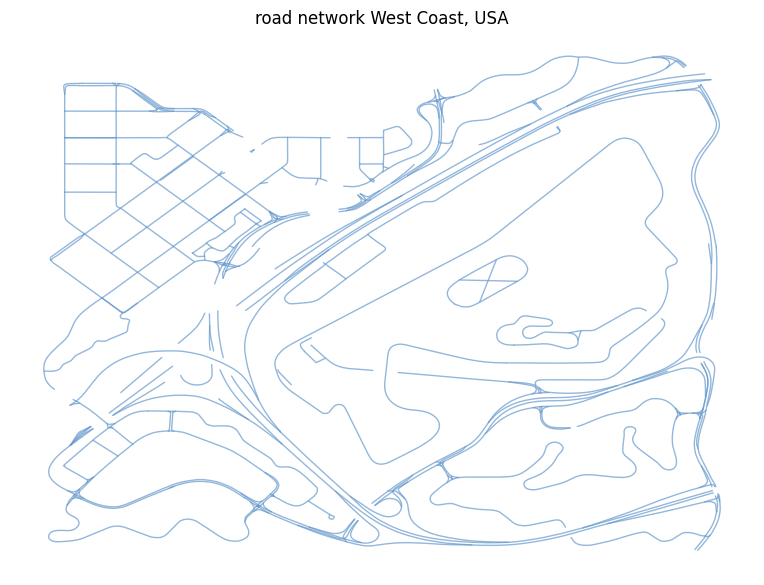

In [6]:
# plot map
def plot_lines(ax, ob):
    blue = '#6699cc'
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=blue, linewidth=1, solid_capstyle='round', zorder=2, alpha=0.7)
    
fig = plt.figure(1, figsize=[9.6, 7.2], dpi=100)

ax = fig.add_subplot()
plot_lines(ax, network)

_ = ax.set_axis_off()
_ = ax.set_title('road network West Coast, USA')